In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()

In [4]:
from AI.PlayerSimulator import PlayerSimulator

from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0)


In [5]:
model.fit(X, y)

LinearSVC()

In [6]:
print(model.predict([X[0]]))
print(y[0])
print(model.get_params())
print(model.coef_)

[1]
1
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
[[0.48314531 1.41824932]]


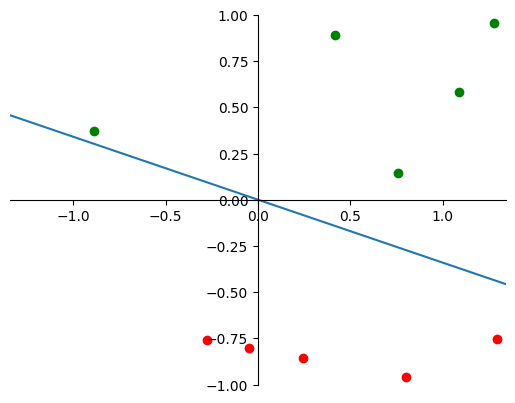

In [7]:
from AI.ai_plot import plot_trials
from AI.ai_utils import *

trials = list(map(lambda x: to_mock_trial(x[0], x[1]), X))
corrects = list(map(lambda ys: ys == 1, y))
anns = ["" for x in X]
norm = np.array([-model.coef_[0][1], model.coef_[0][0]])
plot_trials(norm, trials, corrects, anns, ann_str=True)

[-0.22296624  0.95924761]


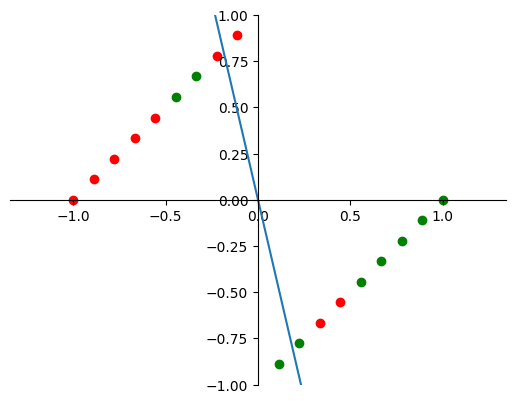

In [128]:
import numpy as np
from sklearn.model_selection import KFold

simulator = PlayerSimulator(45, 0.3)
model = LinearSVC()
n = 10
kf = KFold(n_splits=n)
x = np.linspace(-1, 0, n)
y = np.linspace(0,1, n)

#ds = [[np.random.uniform(-1,0), np.random.uniform(0,1)] for i in range(0, n)]
ds = [[x[i], y[i]] for i in range(0, n)]

ds = np.array(ds)
gt = [False, False,False, True,True, True]

y = []
fitted = []
for i,t in enumerate(ds):
    correct, (_, looked_right) = simulator.predict(to_mock_trial(t[0], t[1]))
    y.append(looked_right)

y = np.array(y)

norms = []
ints = []
vals = []
for train_index, test_index in kf.split(ds):
    curr_model = LinearSVC()
    X_train, X_test = ds[train_index], ds[test_index]
    y_train, y_test = y[train_index], y[test_index]

    nds = []
    ny = []
    for i, t in enumerate(X_train):
        nds.append(t)
        nds.append([-t[0], -t[1]])
        ny.append(y_train[i])
        ny.append(y_train[i] == False)
    

    curr_model.fit(nds, ny)
    norms.append(unit_vector(np.array([-curr_model.coef_[0][1], curr_model.coef_[0][0]])))
    ints.append(curr_model.intercept_)
    vals.append(curr_model.predict(X_test)[0] == y_test)

nds = []
ny = []
for i, t in enumerate(X_train):
    nds.append(t)
    nds.append([-t[0], -t[1]])
    ny.append(y_train[i])
    ny.append(y_train[i] == False)

ds = nds
y = ny

norms = np.array(norms)
ints = np.array(ints)
vals = np.array(vals)

#print(norms)
#print(vals)

final_norm = np.sum(norms, axis = 0)/norms.shape[0]


#model.set_params(final_norm)
print(final_norm)
model.coef_ = final_norm
model.intercept_ = 0.0
#fitted= [ model.predict([t])[0] for t in ds]
#print(fitted)
#print(model.coef_)
#print(model.intercept_)
#anns = model.decision_function(ds)
anns = ["" for a in ds]
#norm = np.array([-model.coef_[0][1], model.coef_[0][0]])
trials = list(map(lambda x: to_mock_trial(x[0], x[1]), ds))
plot_trials(final_norm, trials, y, anns, ann_str=True)
#plot_trials(norm, trials, fitted, anns, ann_str=True)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


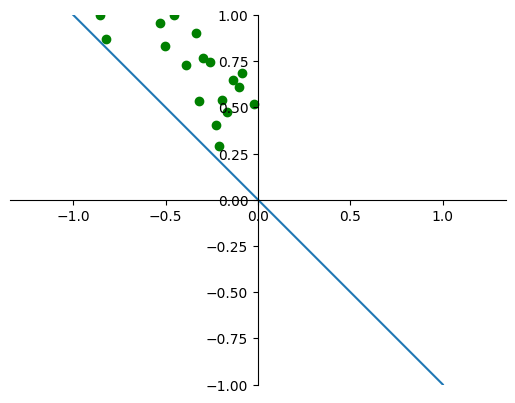

AssertionError: 

In [188]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import OneClassSVM

simulator = PlayerSimulator(45, 0.01)
model = LinearSVC()
n = 30
kf = KFold(n_splits=n)
x = np.linspace(-1, 0, n)
y = np.linspace(0,1, n)

ds = [[np.random.uniform(-1,0), np.random.uniform(0,1)] for i in range(0, n)]
#ds = [[x[i], y[i]] for i in range(0, n)]

ds = np.array(ds)
gt = [False, False,False, True,True, True]

y = []
fitted = []
for i,t in enumerate(ds):
    correct, (_, looked_right) = simulator.predict(to_mock_trial(t[0], t[1]))
    y.append(looked_right)

y = np.array(y)

noise_cleaner = OneClassSVM(kernel = 'linear', gamma = 0.001, nu = 0.03).fit(ds[y])
y_pred = noise_cleaner.predict(ds[y])
print(y_pred)
anns = ["" for i in ds[y]]
trials = list(map(lambda x: to_mock_trial(x[0], x[1]), ds[y]))
plot_trials([-1,1],trials, y_pred == 1, anns, ann_str = True )
assert True == False


norms = []
ints = []
vals = []

nds = []
ny = []
for i, t in enumerate(X_train):
    nds.append(t)
    nds.append([-t[0], -t[1]])
    ny.append(y_train[i])
    ny.append(y_train[i] == False)

ds = nds
y = ny

norms = np.array(norms)
ints = np.array(ints)
vals = np.array(vals)

#print(norms)
#print(vals)

final_norm = np.sum(norms, axis = 0)/norms.shape[0]


#model.set_params(final_norm)
print(final_norm)
model.coef_ = final_norm
model.intercept_ = 0.0
#fitted= [ model.predict([t])[0] for t in ds]
#print(fitted)
#print(model.coef_)
#print(model.intercept_)
#anns = model.decision_function(ds)
anns = ["" for a in ds]
#norm = np.array([-model.coef_[0][1], model.coef_[0][0]])
trials = list(map(lambda x: to_mock_trial(x[0], x[1]), ds))
plot_trials(final_norm, trials, y, anns, ann_str=True)
#plot_trials(norm, trials, fitted, anns, ann_str=True)